# Lab 4: Data Visualization and EDA

Objectives:
- To gain practice in creating various data visualizations
- To encourage students to perform EDA on the required dataset

***

1. Load all Superstore datasets.

*Note: The same dataset used in Lab 3*

In [11]:
import pandas as pd
import numpy as np

superstore_order = pd.read_csv('superstore_order.csv')
superstore_people = pd.read_csv('superstore_people.csv')
superstore_return = pd.read_csv('superstore_return.csv')


2. Determine shape of each dataset (print out the results as well).

In [12]:
print(superstore_order.shape)
print(superstore_people.shape)
print(superstore_return.shape)

(8880, 21)
(4, 2)
(296, 2)


3. Show information of the dataset.


In [13]:
print(superstore_order.info)
print(superstore_people.info)
print(superstore_return.info)

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156  08/11/2016  11/11/2016    Second Class   
1          2  CA-2016-152156  08/11/2016  11/11/2016    Second Class   
2          3  CA-2016-138688  12/06/2016  16/06/2016    Second Class   
3          4  US-2015-108966  11/10/2015  18/10/2015  Standard Class   
4          5  US-2015-108966  11/10/2015  18/10/2015  Standard Class   
...      ...             ...         ...         ...             ...   
8875    8876  US-2016-141264  13/08/2016  19/08/2016  Standard Class   
8876    8877  US-2016-141264  13/08/2016  19/08/2016  Standard Class   
8877    8878  CA-2017-126928  17/09/2017  23/09/2017  Standard Class   
8878    8879  CA-2017-126928  17/09/2017  23/09/2017  Standard Class   
8879    8880  US-2015-107944  23/03/2015  25/03/2015     First Class   

     Customer ID    Customer Name    Segment        Country             City  \
0       CG-12520      C

4. Are there any missing values? If so, in which column?

Ans: No, there are no missing value shown in the information above.

5.
- 5.1 List unique segments
- 5.2 List unique segments and their corresponding count
- 5.3 Create a pie chart to demonstrate unique segments and their count
- 5.4 Briefly describe what could be interpreted from this pie chart

*Note: please create additional cells to answer 5.2 - 5.3*

In [14]:
#5.1
unique_segments = superstore_order['Segment'].unique()

for segment in unique_segments:
  print(segment)

Consumer
Corporate
Home Office


In [15]:
#5.2
count = superstore_order['Segment'].value_counts()
print(count)

Consumer       4613
Corporate      2673
Home Office    1594
Name: Segment, dtype: int64


([<matplotlib.patches.Wedge at 0x7e652e56a740>,
 [Text(-0.06728278517164839, 1.0979403566767851, 'Consumer'),
  Text(-0.5299974390962526, -0.9638997429978982, 'Corporate'),
  Text(0.9296769390550397, -0.5879632547951039, 'Home Office')],
 [Text(-0.0366997010027173, 0.5988765581873372, '51.9%'),
  Text(-0.2890895122343196, -0.5257634961806716, '30.1%'),
  Text(0.5070965122118397, -0.32070722988823847, '18.0%')])

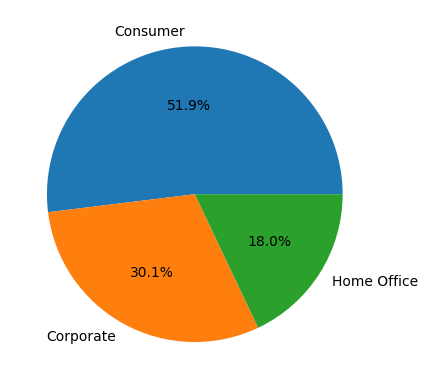

In [19]:
#5.3
import matplotlib.pyplot as plt

plt.pie(count, labels=count.index, autopct='%1.1f%%')

Answer for the question 5.4

Ans: The ratio of customer order of the company most is on consumer and then corporate, so focusing on consumer product would be benefits to the company.

6.
- 6.1 List unique states
- 6.2 List top-10 unique states and their corresponding count
- 6.3 Create a bar chart (vertical) to demonstrate the count of top-10 unique states
- 6.4 Based on 6.2, also include the total sales of these states (show your result as a dataframe)
- 6.5 Using the result from 6.4, if you were the owner of this superstore, what information could be interpreted from this result?

*Note: please create additional cells to answer 6.2 - 6.4*

In [32]:
# Write your code here (6.1)
unique_states = superstore_order['State'].unique()

for State in unique_states:
  print(State)

Kentucky
California
Florida
North Carolina
Washington
Texas
Wisconsin
Utah
Nebraska
Pennsylvania
Illinois
Minnesota
Michigan
Delaware
Indiana
New York
Arizona
Virginia
Tennessee
Alabama
South Carolina
Oregon
Colorado
Iowa
Ohio
Missouri
Oklahoma
New Mexico
Louisiana
Connecticut
New Jersey
Massachusetts
Georgia
Nevada
Rhode Island
Mississippi
Arkansas
Montana
New Hampshire
Maryland
District of Columbia
Kansas
Vermont
Maine
South Dakota
Idaho
North Dakota
Wyoming
West Virginia


In [35]:
#6.2
count_states = superstore_order['State'].value_counts().head(10)
print(count_states)

California        1754
New York          1001
Texas              860
Pennsylvania       531
Washington         452
Illinois           427
Ohio               396
Florida            339
Michigan           230
North Carolina     229
Name: State, dtype: int64


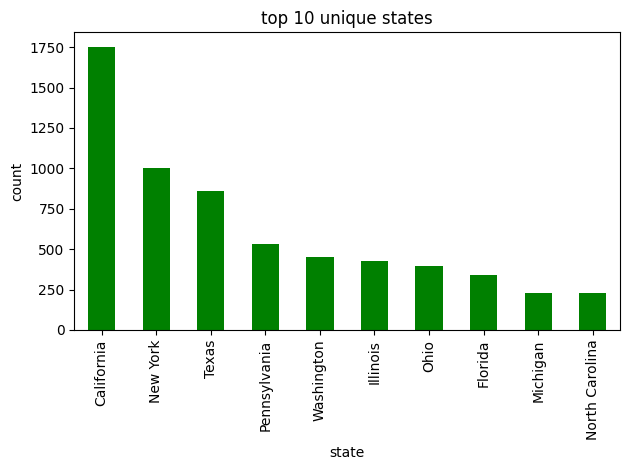

In [42]:
#6.3
import matplotlib.pyplot as plt

count_states.plot(kind='bar', color='green')
plt.title('top 10 unique states')
plt.xlabel('state');plt.ylabel('count')

plt.tight_layout()
plt.show()

In [49]:
#6.4
total_sales = superstore_order[superstore_order['State'].isin(count_states.index)].groupby('State')['Sales'].sum().reset_index()

print("Total Sales for Top 10 States:")
print(total_sales)


Total Sales for Top 10 States:
            State        Sales
0      California  399195.4555
1         Florida   84083.0880
2        Illinois   71456.1780
3        Michigan   62147.6960
4        New York  274866.8190
5  North Carolina   49962.1580
6            Ohio   67924.2140
7    Pennsylvania  103852.5210
8           Texas  147855.0282
9      Washington  124497.7780


Answer for the question 6.5

Ans: California and New York have very high demand and volume, so more product can be ship and sell in these states.

7.
- 7.1 List unique categories
- 7.2 Create a bar chart (horizontal) to demonstrate the proportion of these categories
- 7.3 Compute the ratio of these categories in percentage and print the results

*Note: please create additional cells to answer 7.2 - 7.3*

In [51]:
# Write your code here (7.1)
unique_category = superstore_order['Category'].unique()
for Category in unique_category:
  print(Category)

Furniture
Office Supplies
Technology


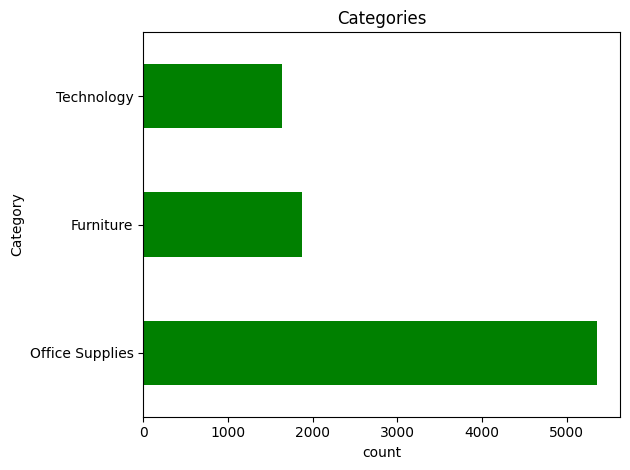

In [57]:
#7.2
import matplotlib.pyplot as plt

count_category = superstore_order['Category'].value_counts()
count_category.plot(kind='barh', color='green')
plt.title('Categories')
plt.xlabel('count');plt.ylabel('Categories')

plt.tight_layout()
plt.show()

In [64]:
#7.3
category_percent = (count_category/count_category.sum()) * 100
print(category_percent)


Office Supplies    60.360360
Furniture          21.171171
Technology         18.468468
Name: Category, dtype: float64


8. Update the type of all columns that contain dates to *datetime* and show information after an update.

In [78]:
date_columns=['Order Date', 'Ship Date']
superstore_order[date_columns]=superstore_order[date_columns].apply(pd.to_datetime)

print(superstore_order[date_columns])

     Order Date  Ship Date
0    2016-08-11 2016-11-11
1    2016-08-11 2016-11-11
2    2016-12-06 2016-06-16
3    2015-11-10 2015-10-18
4    2015-11-10 2015-10-18
...         ...        ...
8875 2016-08-13 2016-08-19
8876 2016-08-13 2016-08-19
8877 2017-09-17 2017-09-23
8878 2017-09-17 2017-09-23
8879 2015-03-23 2015-03-25

[8880 rows x 2 columns]


9. Create a new column "Processing time day" to show number of days taken to ship an order and show your result in a dataframe format.

*Hint: The duration starts as soon as the item has been ordered and ends once the order has successfully shipped.*

In [83]:
superstore_order['Order Date'] = pd.to_datetime(superstore_order['Order Date'])
superstore_order['Ship Date'] = pd.to_datetime(superstore_order['Ship Date'])

superstore_order['Processing time day'] = (superstore_order['Ship Date']-superstore_order['Order Date']).dt.days.abs()

print(superstore_order[['Order Date', 'Ship Date', 'Processing time day']])

     Order Date  Ship Date  Processing time day
0    2016-08-11 2016-11-11                   92
1    2016-08-11 2016-11-11                   92
2    2016-12-06 2016-06-16                  173
3    2015-11-10 2015-10-18                   23
4    2015-11-10 2015-10-18                   23
...         ...        ...                  ...
8875 2016-08-13 2016-08-19                    6
8876 2016-08-13 2016-08-19                    6
8877 2017-09-17 2017-09-23                    6
8878 2017-09-17 2017-09-23                    6
8879 2015-03-23 2015-03-25                    2

[8880 rows x 3 columns]


10. Based on the result in 9.
- 10.1 How many orders are there that take more than 5 days to process?
- 10.2 Show the top 5 rows (expected output should contain these columns: Order ID, Order Date, Ship Date, Processing time day, Quantity)
- 10.3 Plot the histogram based on the column Quantity

*Note: please create additional cells to answer 10.2 - 10.3*

In [87]:
# Write your code here (10.1)
morethan5 = (superstore_order['Processing time day'] > 5).sum()

print(f"Number of orders taking more than 5 days: {morethan5}")

Number of orders taking more than 5 days: 4963


In [89]:
#10.2
order_info = superstore_order[['Order ID', 'Order Date', 'Ship Date', 'Processing time day', 'Quantity']].head()
print(order_info)

         Order ID Order Date  Ship Date  Processing time day  Quantity
0  CA-2016-152156 2016-08-11 2016-11-11                   92         2
1  CA-2016-152156 2016-08-11 2016-11-11                   92         3
2  CA-2016-138688 2016-12-06 2016-06-16                  173         2
3  US-2015-108966 2015-11-10 2015-10-18                   23         5
4  US-2015-108966 2015-11-10 2015-10-18                   23         2


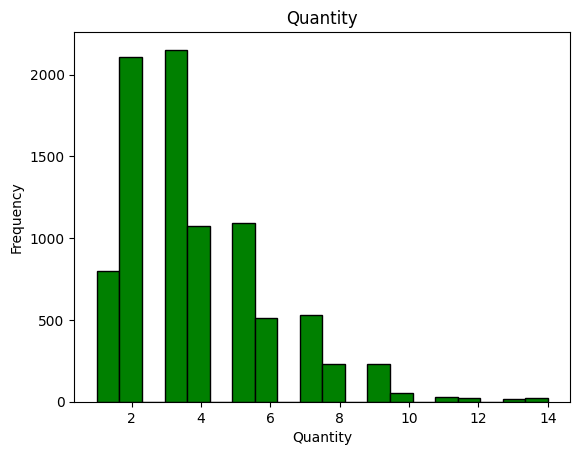

In [99]:
#10.3
plt.hist(superstore_order['Quantity'], bins=20, color='green', edgecolor='black')
plt.title('Quantity')

plt.xlabel('Quantity')
plt.ylabel('Frequency')

plt.show()

[BONUS 20 pts] Determine the percentage of customers who:
- B1)returned the product once
- B2) returned the product at least once
- B3) never returned the product
- Finally, Plot a comparison of B2 and B3

*Note: please create additional cells to answer the above points*

In [105]:
#B1
returned = superstore_return[superstore_return['Returned']=='Yes']['Order ID'].unique()

once = (len(returned)/len(superstore_return['Order ID'].unique())) * 100

print(f"Percentage of customers that returned once: {once:.2f}%")

Percentage of customers that returned once: 100.00%


In [113]:
#B2
returned_once = superstore_return[superstore_return['Returned']=='Yes']['Order ID'].unique()

least_once = (len(returned_once)/len(superstore_return['Order ID'].unique())) * 100

print(f"Percentage of customers that returned_once at least once: {least_once:.2f}%")

Percentage of customers that returned_once at least once: 100.00%


In [112]:
#B3
never_returned = superstore_return[superstore_return['Returned']=='No']['Order ID'].unique()

never = (len(never_returned)/len(superstore_return['Order ID'].unique())) * 100

print(f"Percentage of customers that never never_returned: {never:.2f}%")

Percentage of customers that never never_returned: 0.00%


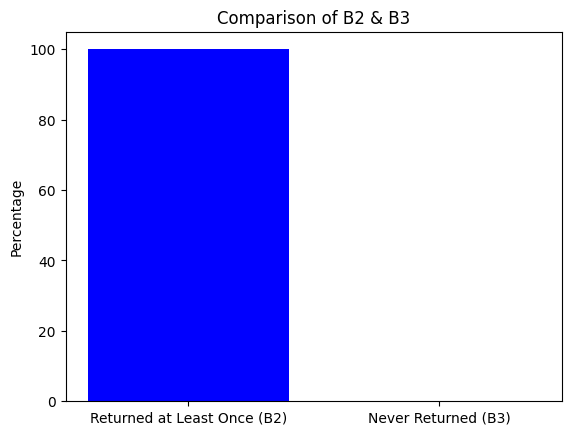

In [115]:
labels = ['Returned at Least Once (B2)', 'Never Returned (B3)']
percentages = [least_once, never]

plt.bar(labels, percentages, color=['blue', 'green'])
plt.title('Comparison of B2 & B3')

plt.ylabel('Percentage')
plt.show()